# Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Loading the Dataset

In [2]:
df = pd.read_csv('Loan Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Summary of the dataset

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,518.000000,518.000000,497.000000,505.000000,473.000000
mean,5522.071429,1844.262162,151.392354,343.128713,0.818182
std,6380.949430,3109.043481,86.970570,63.452529,0.386103
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2807.500000,0.000000,104.000000,360.000000,1.000000
50%,3815.000000,1512.000000,131.000000,360.000000,1.000000
75%,5904.500000,2464.000000,175.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            518 non-null    object 
 1   Gender             505 non-null    object 
 2   Married            516 non-null    object 
 3   Dependents         505 non-null    object 
 4   Education          518 non-null    object 
 5   Self_Employed      493 non-null    object 
 6   ApplicantIncome    518 non-null    int64  
 7   CoapplicantIncome  518 non-null    float64
 8   LoanAmount         497 non-null    float64
 9   Loan_Amount_Term   505 non-null    float64
 10  Credit_History     473 non-null    float64
 11  Property_Area      518 non-null    object 
 12  Loan_Status        518 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.7+ KB


# Preprocessing

In [5]:
# dropping unnecessary columns
cols = ['Loan_ID','Gender', 'Married','Education', 'Loan_Amount_Term']
df = df.drop(columns=cols, axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,NaN,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,1.0,Rural,N
2,0,No,2583,2358.0,120.0,1.0,Urban,Y
3,2,Yes,5417,4196.0,267.0,1.0,Urban,Y
4,0,No,2333,1516.0,95.0,1.0,Urban,Y


## 1. Datatype Conversion

In [6]:
df.dtypes

Dependents            object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
df = df.replace({
    'Dependents':'[+]'
},'',regex=True)

In [9]:
df.Dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [10]:
df.isna().sum()

Dependents           13
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

### Handling the missing value using SimppleImputer

In [11]:
#For Categorical data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Dependents','Self_Employed']])
df[['Dependents','Self_Employed']] = imputer.transform(df[['Dependents','Self_Employed']])

In [12]:
df.isna().sum()

Dependents            0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#For Numerical data
imputer1 = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer1 = imputer.fit(df[['LoanAmount','Credit_History']])
df[['LoanAmount','Credit_History']] = imputer1.transform(df[['LoanAmount','Credit_History']])

In [14]:
df.isna().sum()

Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.Dependents = df.Dependents.astype(int)
df.dtypes

Dependents             int32
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,120.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,1.0,Rural,N
2,0,No,2583,2358.0,120.0,1.0,Urban,Y
3,2,Yes,5417,4196.0,267.0,1.0,Urban,Y
4,0,No,2333,1516.0,95.0,1.0,Urban,Y


## 2. Handling Duplicate Values

In [17]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 1 duplicate values.


,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
280,0,No,4333,2451.0,110.0,1.0,Urban,N
393,0,No,4333,2451.0,110.0,1.0,Urban,N


In [18]:
# remove duplicate values
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [19]:
# check for duplicate values after removing duplicates
print("There are {} duplicate values.".format(df.duplicated().sum()))
df.head()

There are 0 duplicate values.


,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,120.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,1.0,Rural,N
2,0,No,2583,2358.0,120.0,1.0,Urban,Y
3,2,Yes,5417,4196.0,267.0,1.0,Urban,Y
4,0,No,2333,1516.0,95.0,1.0,Urban,Y


## 3. Dealing with Outliers

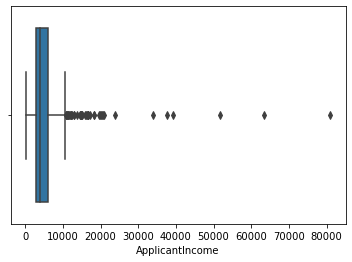

In [20]:
#Boxplot to check outliers in income of the applicant
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

In [21]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = df.ApplicantIncome.quantile(0.25)
Q3 = df.ApplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [22]:
# df[(df.ApplicantIncome < lowerlimit)  | (df.ApplicantIncome > upperlimit)] 

In [23]:
# Droping the rows containing height beyond lower and upper limit.
df_1 = df[(df.ApplicantIncome > lowerlimit) & (df.ApplicantIncome < upperlimit)]
df_1.shape

(473, 8)

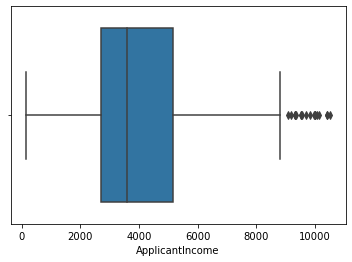

In [24]:
sns.boxplot(x=df_1['ApplicantIncome'])
plt.show()

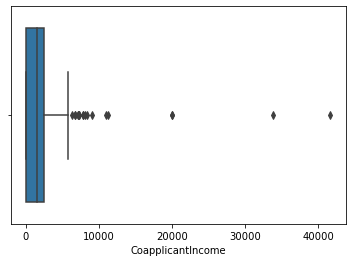

In [25]:
#Boxplot to check outliers in income of the coapplicant
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

In [26]:
Q1 = df.CoapplicantIncome.quantile(0.25)
Q3 = df.CoapplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit1 = Q3 + (IQR * 1.5)
lowerlimit1 = Q1 - (IQR * 1.5)

In [27]:
 # Droping the rows containing height beyond lower and upper limit.
df_1 = df[(df.CoapplicantIncome > lowerlimit1) & (df.CoapplicantIncome < upperlimit1)]
df_1.shape

(499, 8)

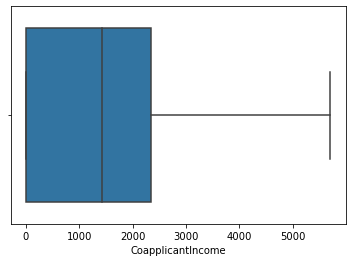

In [28]:
#Boxplot to check outliers in income of the coapplicant
sns.boxplot(x=df_1['CoapplicantIncome'])
plt.show()

In [29]:
df_1.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,120.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,1.0,Rural,N
2,0,No,2583,2358.0,120.0,1.0,Urban,Y
3,2,Yes,5417,4196.0,267.0,1.0,Urban,Y
4,0,No,2333,1516.0,95.0,1.0,Urban,Y


In [30]:
df_1.shape

(499, 8)

# Exploratory Data Analysis

<AxesSubplot:xlabel='Dependents', ylabel='count'>

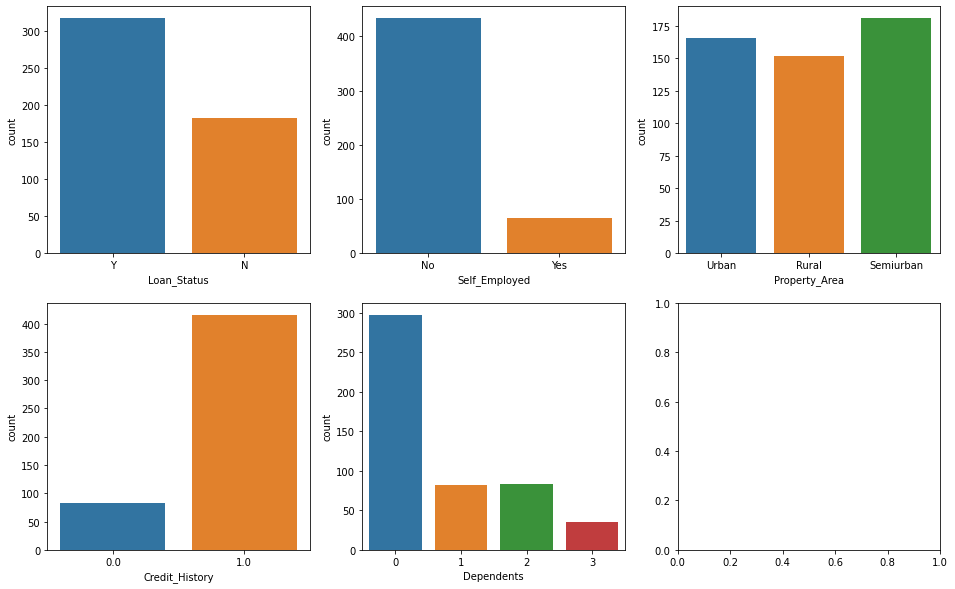

In [31]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.countplot('Loan_Status', data=df_1,ax=ax[0][0])
# sns.countplot('Education', data=df_1,ax=ax[0][1])
sns.countplot('Self_Employed', data=df_1,ax=ax[0][1])
sns.countplot('Property_Area', data=df_1,ax=ax[0][2])
sns.countplot('Credit_History', data=df_1,ax=ax[1][0])
sns.countplot('Dependents', data=df_1,ax=ax[1][1])

#### More Loans are approved Vs Rejected

#### Count of self-employed is less than that of Non-Self-employed

#### Maximum properties are located in Semiurban areas

#### Credit History is present for many applicants

#### The count of applicants with several dependents=0 is maximum.

# Numerical attributes visulaization


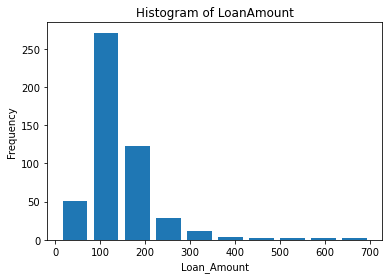

In [33]:
xdf1 = df_1.LoanAmount
plt.hist(xdf1,bins=10,rwidth=0.8)
plt.title('Histogram of LoanAmount')
plt.xlabel('Loan_Amount')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

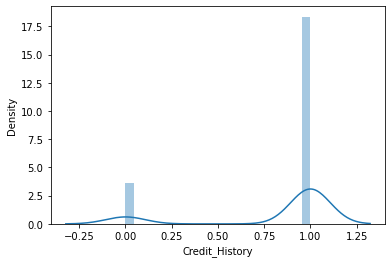

In [35]:
sns.distplot(df_1['Credit_History'])

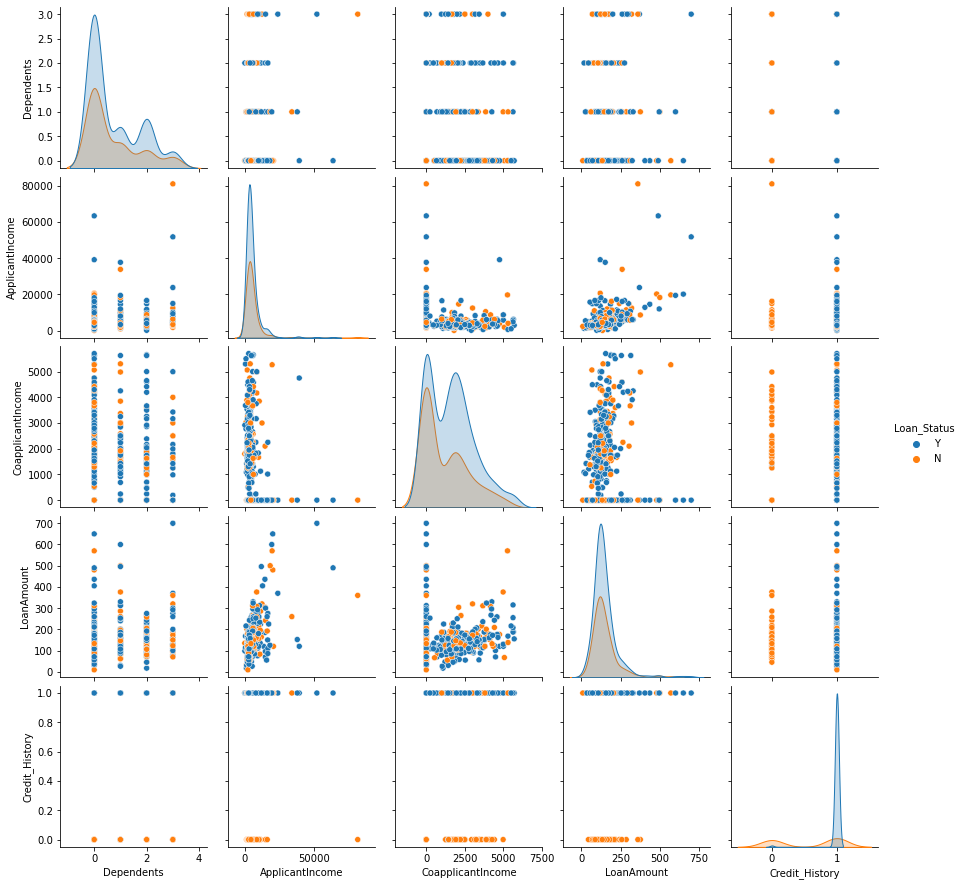

In [36]:
sns.pairplot(df_1, hue = 'Loan_Status')
plt.show()

## Correlation Matrix

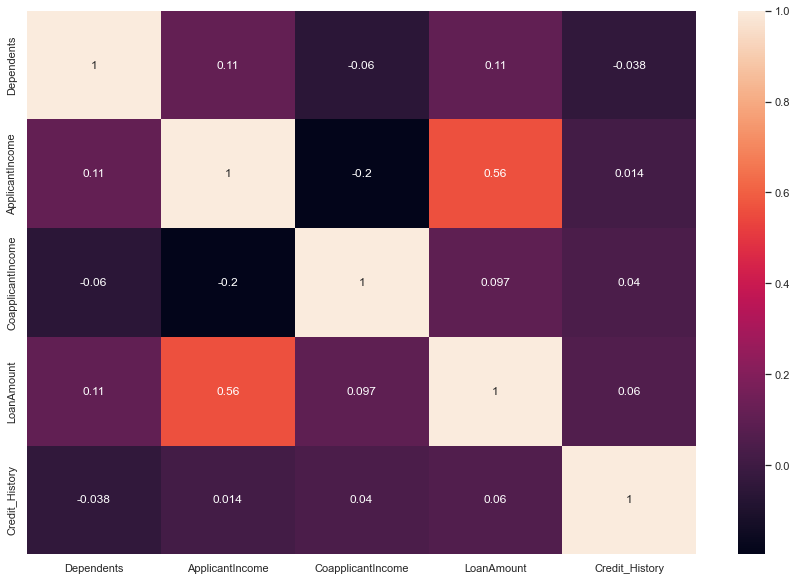

In [37]:
corr = df_1.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)

plt.savefig("corr.png", bbox_inches="tight")
plt.show()

In [38]:
#Separate the features from the label
#The label here is the Loan_Status

X = df_1.drop('Loan_Status', axis=1)
y = df_1['Loan_Status']



In [39]:
X.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,0,No,5849,0.0,120.0,1.0,Urban
1,1,No,4583,1508.0,128.0,1.0,Rural
2,0,No,2583,2358.0,120.0,1.0,Urban
3,2,Yes,5417,4196.0,267.0,1.0,Urban
4,0,No,2333,1516.0,95.0,1.0,Urban


In [40]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [41]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y , test_size = 0.20, shuffle = True,
                                                    stratify=y)

In [42]:
X_train.shape

(399, 7)

# Creating Pipeline for the model

In [43]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

In [44]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'], dtype='object')
Index(['Self_Employed', 'Property_Area'], dtype='object')


In [45]:
numeric_index = [X.columns.get_loc(col) for col in numeric_cols]
numeric_index

[2, 3, 4, 5]

In [46]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[1, 6]

In [47]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('scaler',MinMaxScaler(feature_range = (0,10))) #Normalize the data
] )

categorical_transformer = Pipeline(steps = [
    ('imputeC',SimpleImputer(strategy='most_frequent')), #Handline numeric missing value with median
    ('oneHot',OneHotEncoder(handle_unknown='ignore')) #Normalize the data
] )

In [48]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('numeric',numeric_transformer,numeric_index),
                ('categorical',categorical_transformer,categorical_index)]
)

# Using KNeighbours

In [49]:
from sklearn.neighbors import KNeighborsClassifier


In [51]:
trainscore = []
testscore = []
for k in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn_model1 = Pipeline(steps=
                         [
                            ('prep', preprocessor),
                            ('est', knn1)
                        ])
    knn_model1.fit(X_train,Y_train)
    trainscore.append(knn_model1.score(X_train,Y_train))
    testscore.append(knn_model1.score(x_test,y_test)) 

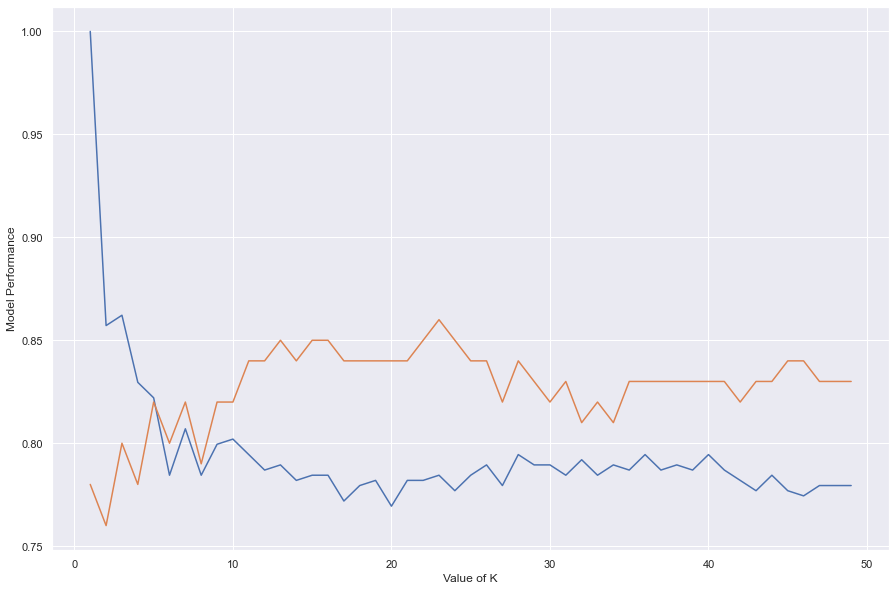

In [52]:
sns.lineplot(x = np.arange(1,50),y = trainscore)
sns.lineplot(x = np.arange(1,50),y = testscore)
plt.xlabel("Value of K")
plt.ylabel("Model Performance")
plt.show()

In [70]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [71]:
knn_model = Pipeline(steps=
                        [
                            ('prep', preprocessor),
                            ('est', knn)
                        ])

In [72]:
from sklearn import set_config

set_config(display='diagram')
#fit data
knn_model.fit(X_train, Y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler(feature_range=(0,
                                                                                               10)))]),
                                                  [2, 3, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 6])])),
                ('est', KNeighborsClassifier())])

In [73]:
y_pred = knn_model.predict(x_test)
print(y_pred)

['N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y']


Report : 
              precision    recall  f1-score   support

           Y       0.80      0.67      0.73        36
           N       0.83      0.91      0.87        64

    accuracy                           0.82       100
   macro avg       0.81      0.79      0.80       100
weighted avg       0.82      0.82      0.82       100



<AxesSubplot:>

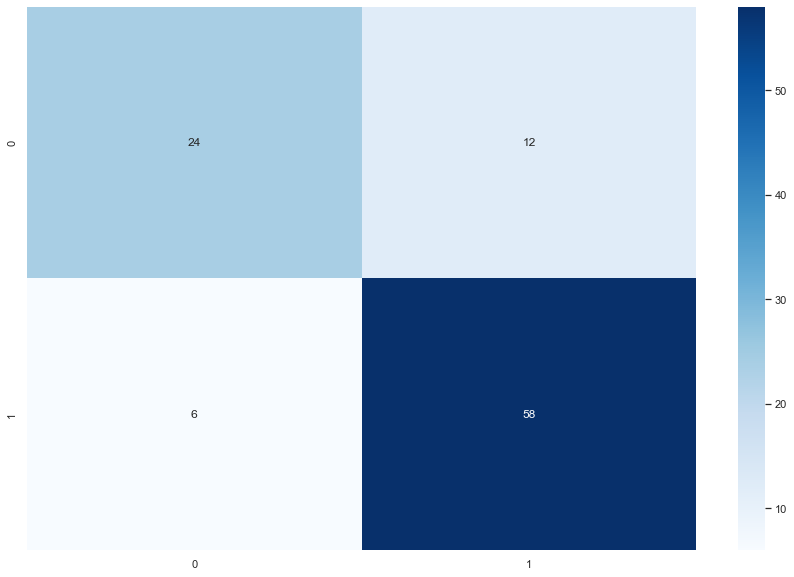

In [74]:
#Summarise the fit of the model
report1 = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report1))

#Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1,annot=True,cmap='Blues')

# Model Score Checking

In [75]:
knn_model.score(X_train, Y_train)

0.8220551378446115

In [76]:
knn_model.score(x_test, y_test)

0.82

# Model Prediction

In [77]:
y_pred

array(['N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [78]:
x_test.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
441,2,No,3588,0.0,110.0,0.0,Rural
19,1,No,5955,5625.0,315.0,1.0,Urban
248,3,No,4416,1250.0,110.0,1.0,Urban
371,0,No,7901,1833.0,180.0,1.0,Rural
133,1,No,3089,1280.0,121.0,0.0,Semiurban


In [79]:
sample = [['2', 'No', 3900, 0.0, 90.0, 1.0, 'Semiurban']]
sample

[['2', 'No', 3900, 0.0, 90.0, 1.0, 'Semiurban']]

In [80]:
knn_model.predict(sample)

array(['Y'], dtype=object)

In [81]:
df_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_final.head(10)

,Actual,Predicted
441,N,N
19,Y,Y
248,Y,Y
371,Y,Y
133,N,N
296,N,N
331,Y,Y
64,N,N
309,Y,Y
152,N,Y


# Saving the Model

In [84]:
#Save Model using pickle
import pickle
pickle.dump(knn_model, open("model.pkl","wb"))

In [85]:
#load pickle model
model = pickle.load(open("testmodel.pkl","rb"))
model